В рамкках данного ноутбука будем рассматривать относительно большой кейс данных с ресурса Kaggle. Ссылка: https://www.kaggle.com/carrie1/ecommerce-data


Это транснациональный набор данных, который содержит все транзакции, происходящие в период с 01/12/2010 по 09/12/2011 для британской и зарегистрированной не магазинной онлайн-розницы.Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.

Пропущенные значения (полные)

Период времени (полный)

Номер счета-фактуры (полный)

Коды акций (полные)

Описания (полные)

Клиенты

Страны (полные)

цена за единицу

Количество (полное)

Поступления

Вывод

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
df=pd.read_csv('data.csv',encoding='cp1251')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [51]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

В данном дата сете, есть пропущенные значения, но пока пойдём дальше

In [52]:
df.shape

(541909, 8)

In [53]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Первое на что можно обратить внимание это отрицательные значения по колонке цены и количества, к сожалению, на данный момент почему так и что это означает (может быть возврат/отказ от продукции?) мы не узнаем.

In [54]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Начинаем обрабатывать данные для начала обрабоданные столбец с данными о дате

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [56]:
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

Сначала изучим по ID наиболее активных покупателей

In [57]:
df.groupby('CustomerID')['Quantity'].agg(['sum', 'count']).sort_values('sum', ascending = False)

,sum,count
CustomerID,,
14646.0,196719,2085
12415.0,77242,778
14911.0,77180,5903
17450.0,69029,351
18102.0,64122,433
...,...,...
16252.0,-158,21
16742.0,-189,4
14213.0,-244,5


Если бы нам нужен был список самый активных юзеров, можно было бы воспользоваться данной таблицей, группировкой

In [88]:
df.groupby('StockCode')['Quantity'].agg(['sum', 'count']).sort_values('sum', ascending = False)

,sum,count
StockCode,,
22197,56450,1476
84077,53847,542
85099B,47363,2159
85123A,38830,2313
84879,36221,1502
...,...,...
79323LP,-2618,1
79323W,-4838,2
72140F,-5368,1


В данном списке мы имеем отсортированные значения по кодам продукции, можно видеть наиболее и наимее постребованные товары

In [58]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [59]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [94]:
top_country_Quantity = df.groupby('Country', as_index=False)['Quantity'].agg(['sum', 'count']).sort_values('sum', ascending = False).head(15)
top_country_Quantity

,sum,count
Country,,
United Kingdom,4263829,495478
Netherlands,200128,2371
EIRE,142637,8196
Germany,117448,9495
France,110480,8557
Australia,83653,1259
Sweden,35637,462
Switzerland,30325,2002
Spain,26824,2533


В данном списке можно видеть страны, откуда наблюдается больше всего заказов.

In [67]:
df_new = df[df.Quantity > 0]
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,9,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,4


Далее отбираем значения для дальнейшего анализа, убираем отрицательное значение по количетсву вещей, предполагая, что это возвраст продукции и дохода это не приносит

In [68]:
df_new['revenue'] = df_new['Quantity'] * df_new['UnitPrice']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,day_of_week,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,9,4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,4,16.60


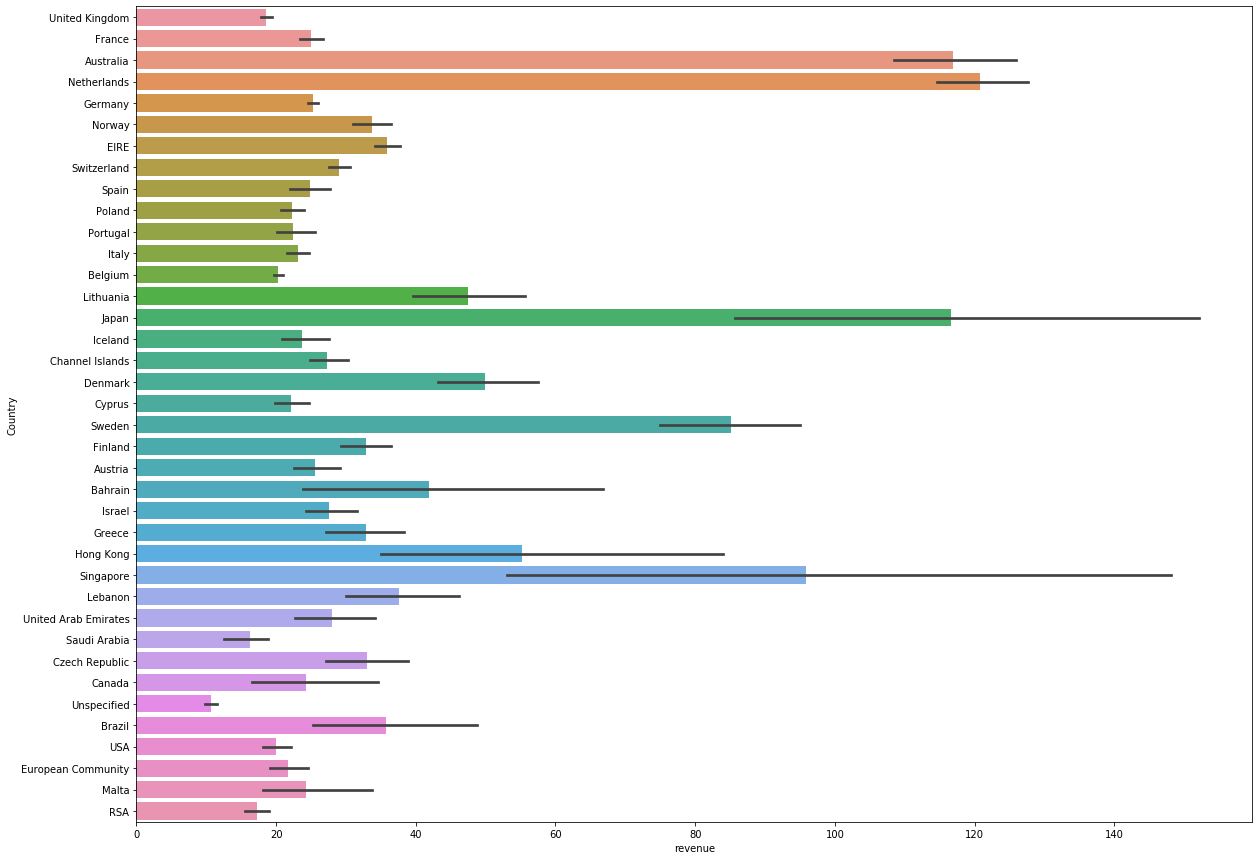

In [71]:
plt.subplots(figsize=(20,15))
sns.barplot(x='revenue', y='Country', data=df_new);

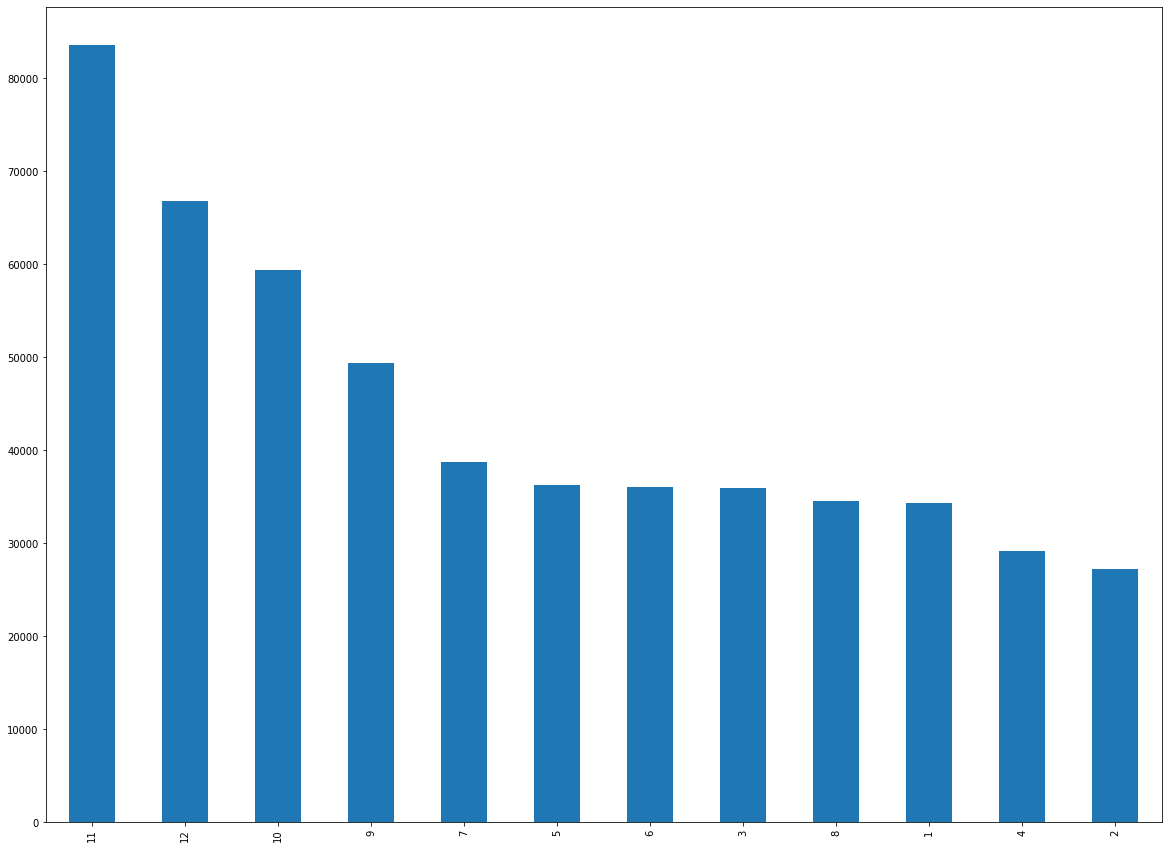

In [74]:
plt.subplots(figsize=(20,15))
df_new.month.value_counts().plot(kind='bar')

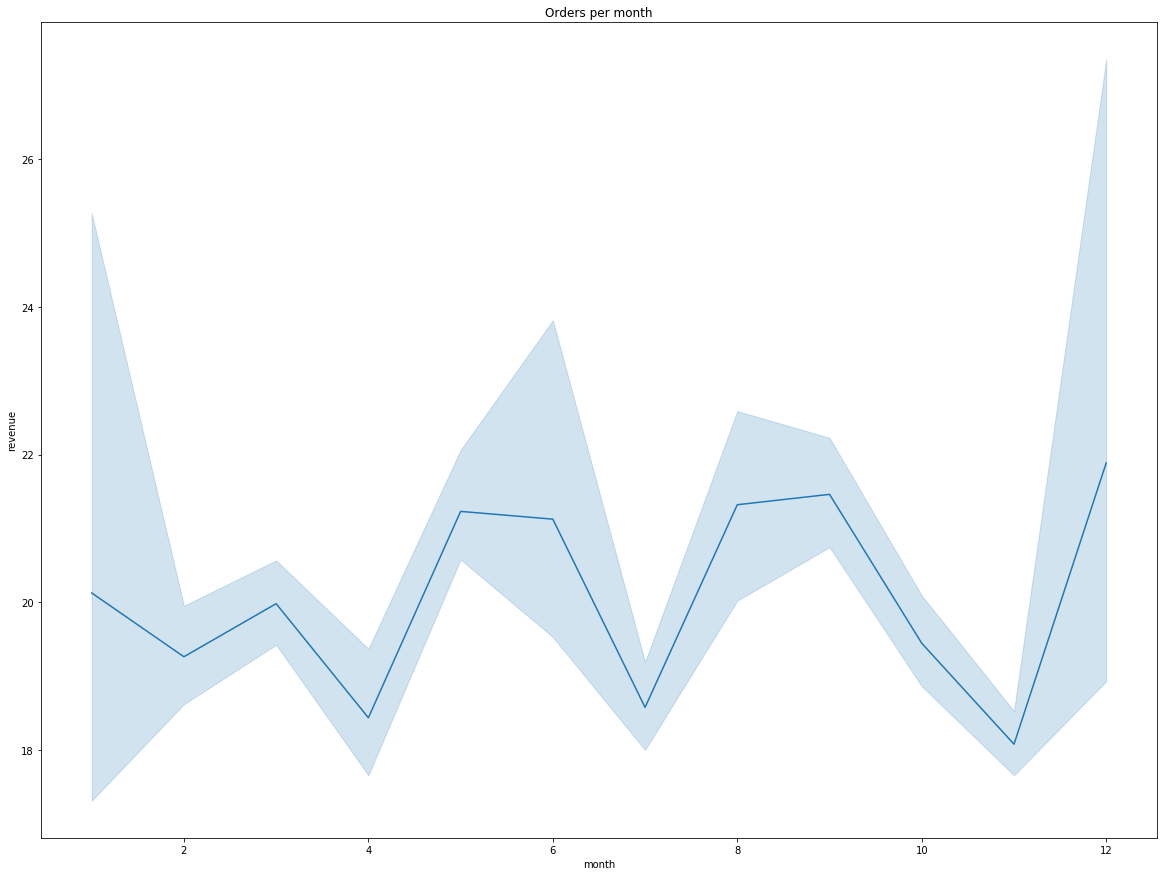

In [78]:
plt.subplots(figsize=(20,15))
ax = sns.lineplot(x="month", y = "revenue", data=df_new)
ax.set_title('Orders per month');

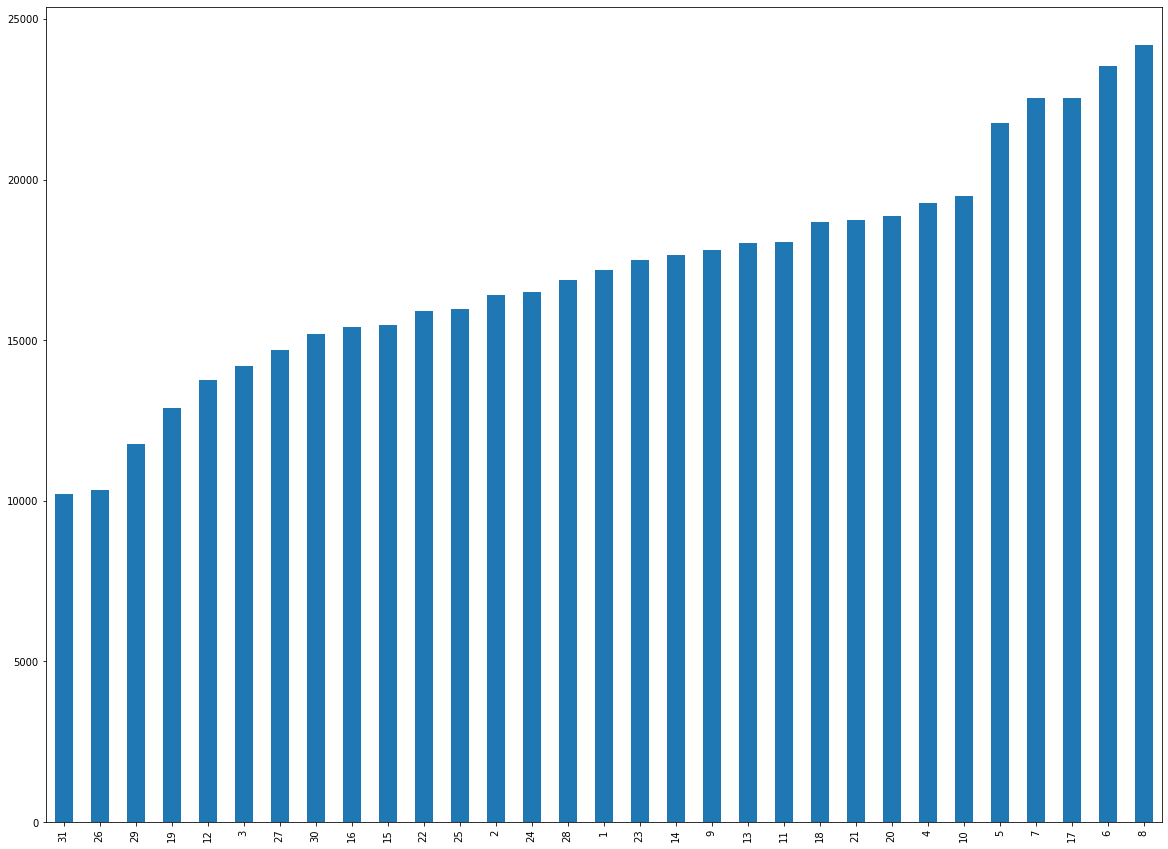

In [76]:
plt.subplots(figsize=(20,15))
df_new.day.value_counts(ascending=True).plot(kind='bar')

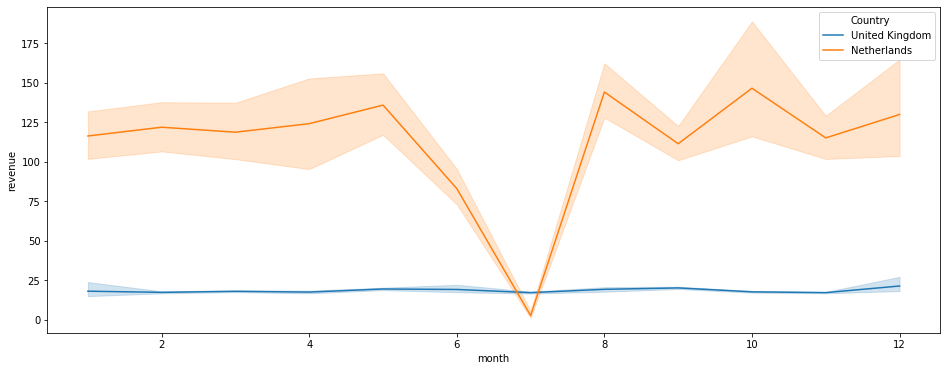

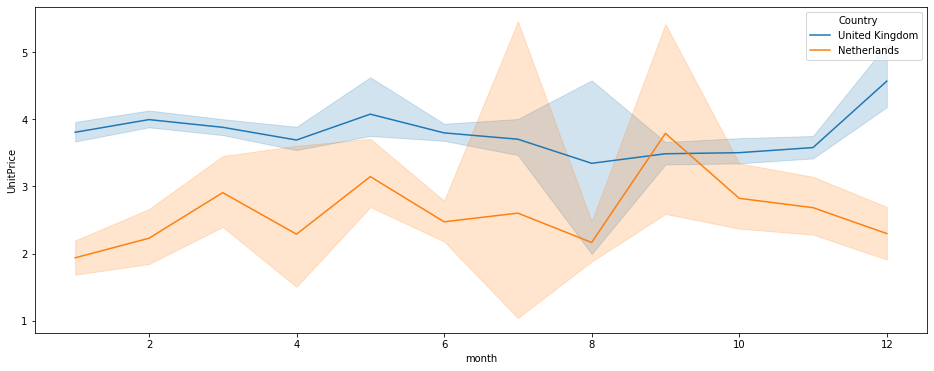

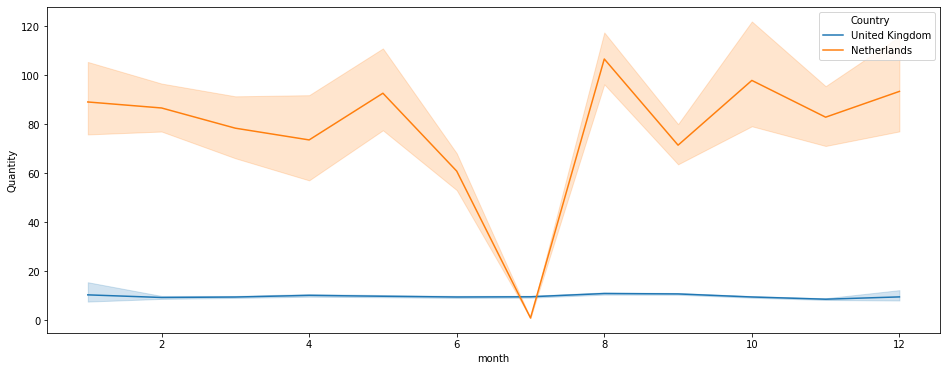

In [96]:
df_country = df_new[df_new['Country'].isin(['United Kingdom','Netherlands'])]
plt.figure(figsize=(16,6))
d=np.arange(1,13)
sns.lineplot(data = df_country, x='month', y='revenue', hue= 'Country');



plt.figure(figsize=(16,6))
d=np.arange(1,13)
sns.lineplot(data = df_country, x='month', y='UnitPrice', hue= 'Country');



plt.figure(figsize=(16,6))
d=np.arange(1,13)
sns.lineplot(data = df_country, x='month', y='Quantity', hue= 'Country');


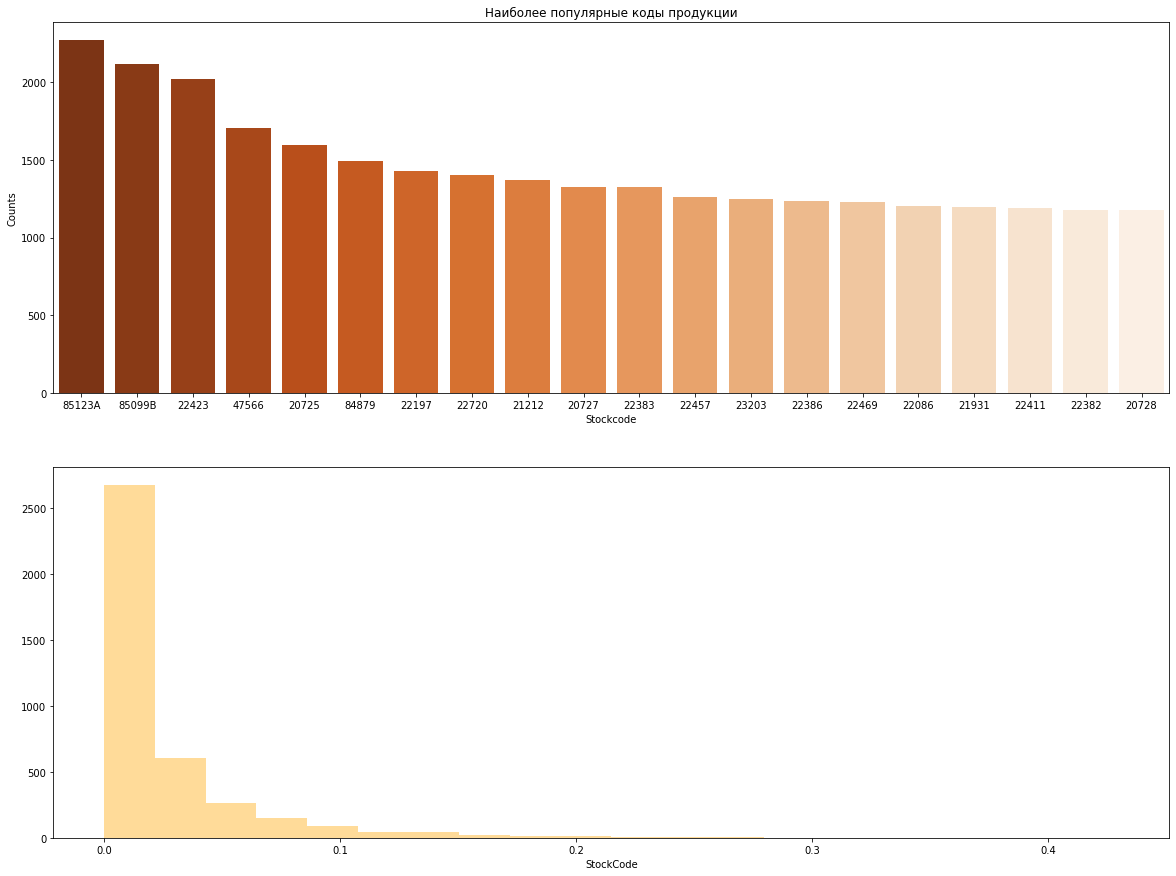

In [104]:
stockcode_counts = df_new.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Наиболее популярные коды продукции");
sns.distplot(np.round(stockcode_counts/df_new.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")

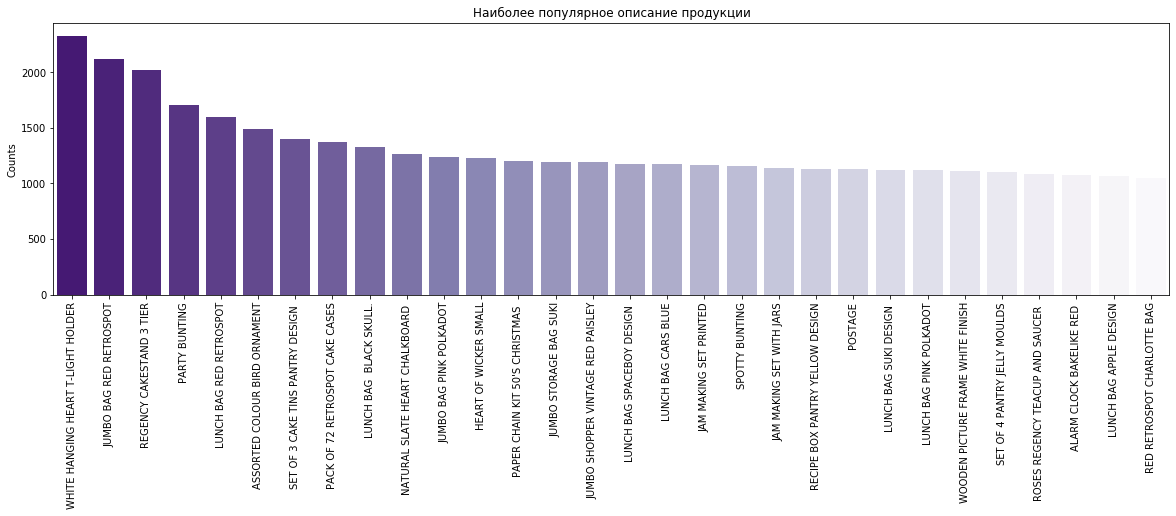

In [106]:
description_counts = df_new.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Наиболее популярное описание продукции");
plt.xticks(rotation=90);

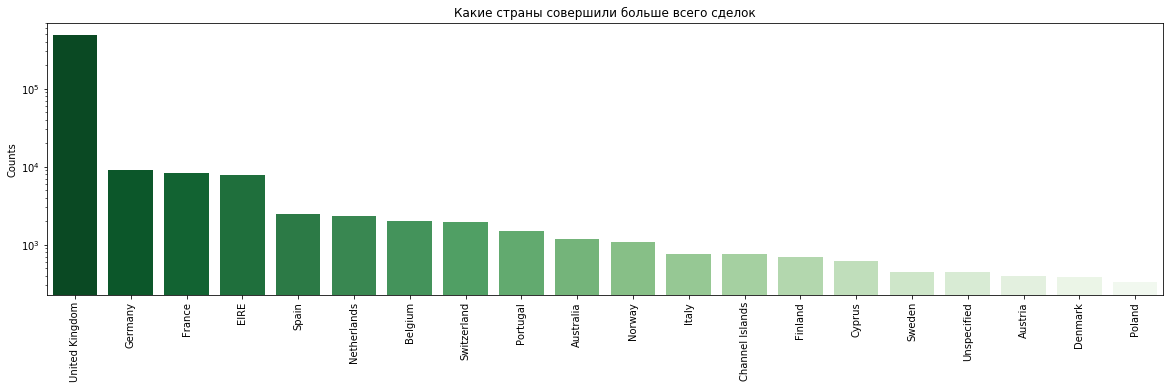

In [107]:
country_counts = df_new.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Какие страны совершили больше всего сделок");
plt.xticks(rotation=90);
plt.yscale("log")

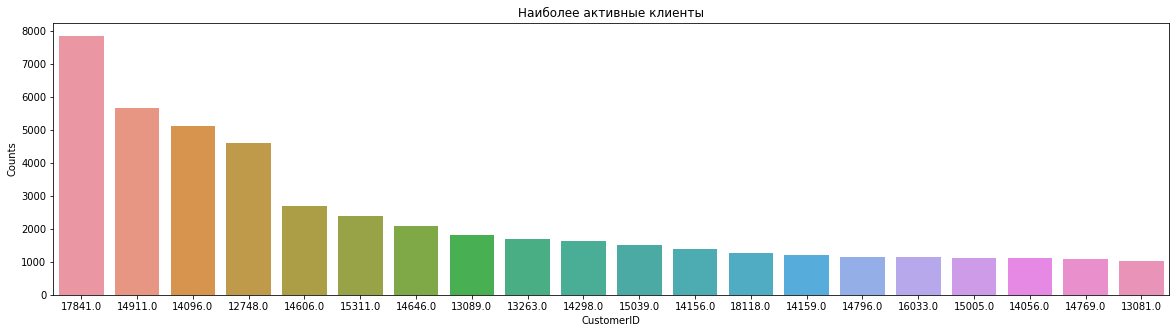

In [108]:
customer_counts =  df_new.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Наиболее активные клиенты");

На текущем этапе пока отложим данный датасет, до нового подхода к анализу